In [25]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


In [26]:
data = pd.read_csv("USA_Housing.csv")

In [27]:
import seaborn as sns

In [28]:
#show column names
data.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [29]:
#rename columns
data.rename(columns={'Avg. Area Income': "median_income", "Avg. Area House Age": "house_age", "Avg. Area Number of Rooms": "rooms", "Avg. Area Number of Bedrooms": "bedrooms"}, inplace=True) #rename takes in dictionary

In [30]:
data.head()

,median_income,house_age,rooms,bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [31]:
#statistic summary
data.describe()

,median_income,house_age,rooms,bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


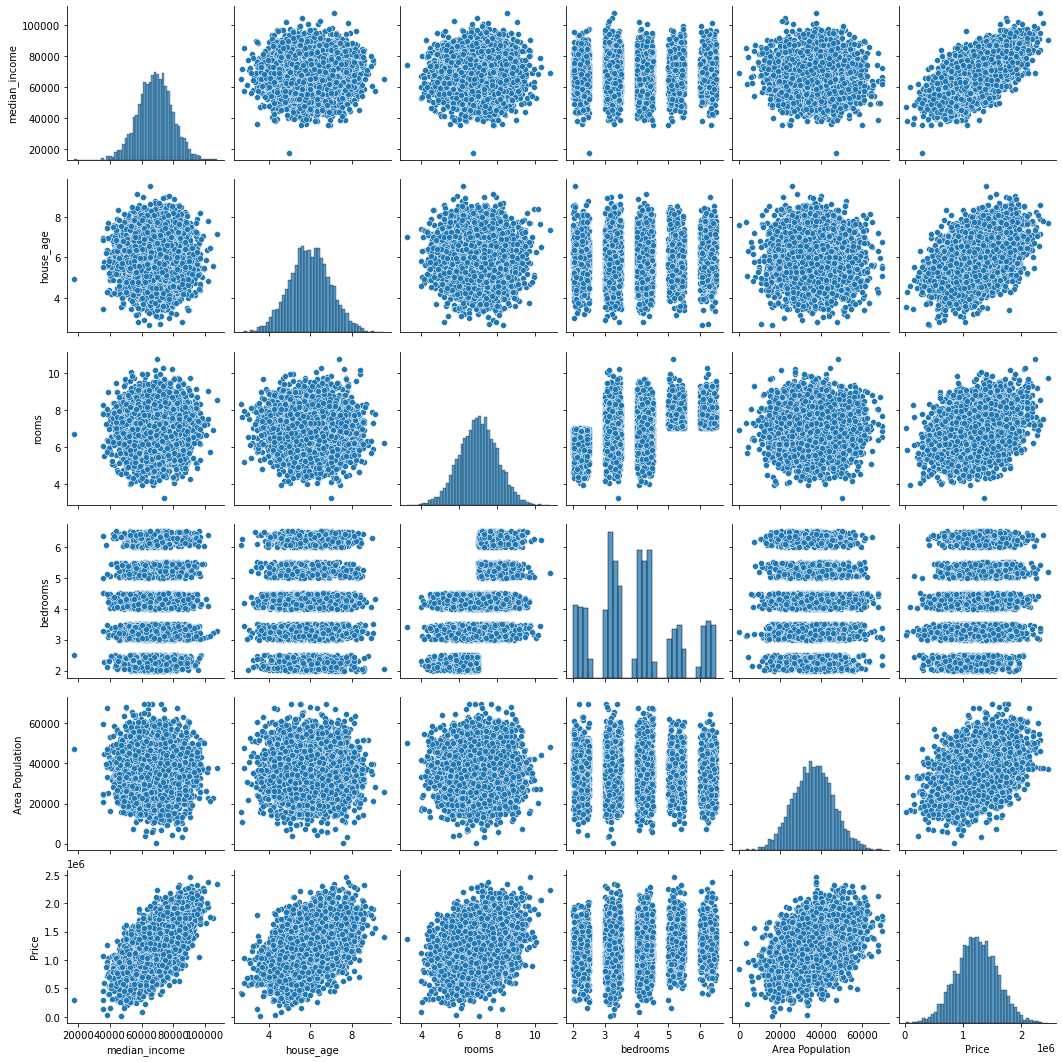

In [32]:
#pairplots for columns
#show the corrolation

sns.pairplot(data)

/Users/sun/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

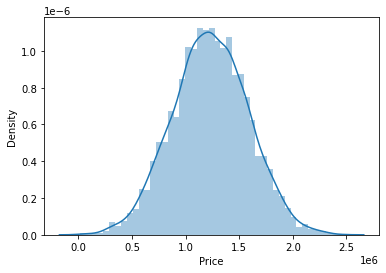

In [33]:
#view a distribution for your target column (price)
sns.distplot(data["Price"])

In [34]:
#show correlatioin between variables
data.corr()

,median_income,house_age,rooms,bedrooms,Area Population,Price
median_income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
house_age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


<AxesSubplot:>

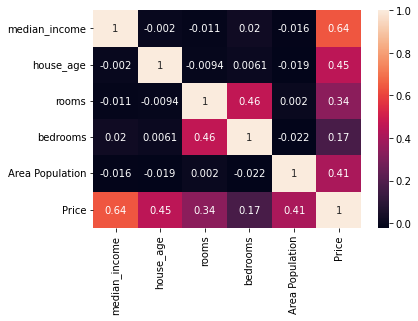

In [35]:
#heatmap
sns.heatmap(data.corr(), annot=True)

In [36]:
data.columns

Index(['median_income', 'house_age', 'rooms', 'bedrooms', 'Area Population',
       'Price', 'Address'],
      dtype='object')

In [37]:
data.shape #(row, column)

(5000, 7)

In [38]:
#1. split dataset into features and target value
#target value = Y
#features = x
X = data[['median_income', 'house_age', 'rooms', 'bedrooms', 'Area Population']]
y = data["Price"]

In [39]:
#2. split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)







In [40]:
#3. import the linear regression model

from sklearn.linear_model import LinearRegression

#create an instance of LinearRegression Class
lm = LinearRegression()

#train my model on my training data
lm.fit(X_train, y_train)




LinearRegression()

In [41]:
lm.intercept_ #if theres a value, then theres a linear model

-2640159.796853721

In [42]:
#check the coefficients
lm.coef_

array([2.15282755e+01, 1.64883282e+05, 1.22368678e+05, 2.23380186e+03,
       1.51504200e+01])

In [43]:
#create a dataframe of coefficients
cdf = pd.DataFrame(lm.coef_, X_train.columns, columns=["Coeff"])

In [44]:
cdf

,Coeff
median_income,21.528276
house_age,164883.282027
rooms,122368.678027
bedrooms,2233.801864
Area Population,15.150420


In [46]:
## Making Predictions using our Model##

In [47]:
predictions = lm.predict(X_test)

In [48]:
predictions #always an array of values

#PREDICTIVE MODEL
#Questions: how many values are in this prediction set?
#2000 values since our test set size is 40%

#each one represent what?
#these values are prices since price is our target value

array([1260960.70567629,  827588.75560301, 1742421.24254362, ...,
        372191.40626868, 1365217.15140901, 1914519.54178954])

In [49]:
#check
predictions.shape

(2000,)

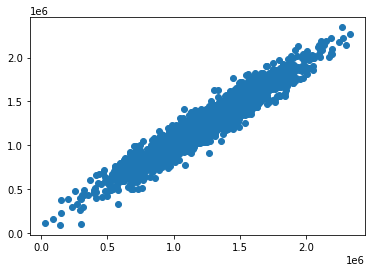

In [50]:
#compare predictions with actual values
plt.scatter(y_test, predictions)

/Users/sun/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

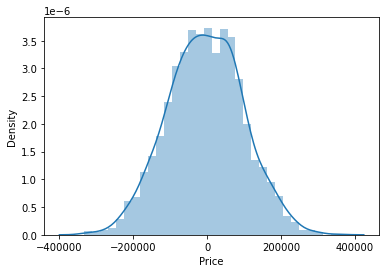

In [51]:
#check the distribution of the residuals

sns.distplot(y_test - predictions)